<a href="https://colab.research.google.com/github/PoojaGoel-IIT/deep_learning_assignments/blob/main/Computer_Vision_Architectures_and_Benchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Assignment 1

In this assignment:
* We will explore and implement the TripletMargin loss function.
* Write custom Datasets and model classes that are compatible with the TripletMargin loss function.
* Introduce ResNet blocks
* Visualize the learnign objective of TripletMargin loss
* Write a classifier model to work on top of a embedding model



# TripletMarginLoss

TripletMargin loss was first introduces for face recoginition in 2015 by some google researchers in their paper [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/pdf/1503.03832.pdf).

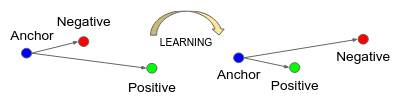

In short triplet margin loss works on a triple consisting of an anchor data, positive data and negative data. The loss function moves the postive data close to the anchor data while seperating the negative data from the anchor data.
**Triplet Loss encourages that dissimilar pairs be distant from any similar pairs by at least a certain margin value.**

# Resources

https://arxiv.org/pdf/1503.03832.pdf

https://towardsdatascience.com/triplet-loss-advanced-intro-49a07b7d8905

https://en.wikipedia.org/wiki/Triplet_loss

https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginLoss.html



# General instructions

* This assignment is due on 28th Feb 2023, 23:59
* In the notebook it is clearly mentioned where changes have to be made through comments and **[TODO]** markers. However, questions can be asked from any code in this notebook. Therefore, make sure you understand the code in the notebook
* Clearly mention any sources used for answering the questions
* By submitting this assignment solution, you confirm to follow the IITGN's honor code. We shall strictly penalize the submissions containing plagiarized text/code.


# Questions

Explain the functionality of lines marked by the marked "_<--- Question {number}_ "

Each question carries 0.2 marks

# Answers [0.2 Marks x 10]

#### Write your answers here ###

1. Answer1
positive_list =  self.index[self.index!=item][self.labels[self.index!=item]==anchor_label] we are extracting index of all the images having the same label as the anchor image in the dataset.The self.index variable contains the indices of all images in the dataset.self.labels variable contains the labels of all images. this is selecting the indices that are not equal to the anchor image index, and have the same label as the anchor image. In other words, positive_list contains the indices of all samples in the dataset that have the same label as the "anchor" sample, except for the "anchor" sample itself.

2. Answer2
In order to create a residual block in the architecture, the method
function def _make_layer(self, block, planes, blocks, stride=1, dilate=False) is defined in the PyTorch implementation of a ResNet neural network.The method then creates blocks instances of the block class, passing in the appropriate arguments, and returns them as a sequential container.The method first sets a variable norm_layer to the normalization layer used in the network (e.g., batch normalization). It then sets downsample to None, which will be used to create a downsampling layer if needed.
If dilate is True, the dilation factor is increased and the stride is set to 1.This increases the receptive field of the network without increasing the number of parameters or computational cost.
If the stride is not 1 or the number of input channels is not equal to the number of output channels times the expansion factor of the block, a downsampling layer is created using a 1x1 convolutional layer followed by the normalization layer.

3. Answer3
x=self.avgpool(x) performs average pooling on the input x after passing it through the convolutional layers and the residual blocks.
calling x = self.avgpool(x) applies average pooling to the output tensor x from the last residual block, and returns a tensor with dimensions [batch_size, channels, 1, 1].
self.avgpool is an average pooling layer defined in the ResNet class. It takes the output tensor from the layer before it, which has dimensions [batch_size, channels, height, width], and applies average pooling to the spatial dimensions (height and width).

4. Answer4
F.normalize is a function from the torch.nn.functional module that normalizes a tensor along a given dimension using the L2 norm.
embedding is a tensor representing the output of a neural network layer. The p=2 argument specifies that the L2 norm should be used for normalization. The dim=1 argument specifies that the normalization should be performed along the second dimension of the tensor, which corresponds to the embedding dimension of the output.
The purpose of normalizing the embedding is to ensure that each vector has unit length in the embedding space.normalizing the embedding vector is useful for calculating distances between vectors using the Euclidean distance metric
5. Answer5

This line of code initializes an optimizer object of the Adam optimization algorithm with a learning rate of 0.001. The optimizer is used to update the model parameters during training.
The Adam optimizer is a stochastic gradient descent optimization algorithm that computes adaptive learning rates for each parameter. It is widely used in deep learning and is known for its efficiency and good performance. The learning rate controls the step size at each iteration of the optimization algorithm, and a smaller learning rate typically leads to slower but more precise convergence.
6. Answer6
test results = tmp [labels==label] builds a new numpy array tmp by choosing all test results rows that correspond to the images associated with a certain label. The labels array, which defines the label for each input image, is an array with the same shape as the test results.

7. Answer7
self.embedding_model.eval() sets the embedding_model to evaluation mode. In PyTorch, some layers, such as Dropout and BatchNorm, behave differently during training and evaluation. During training, Dropout randomly sets some activations to zero, while BatchNorm normalizes the activations. However, during evaluation, we don't want the model to modify the activations, so we turn off Dropout and BatchNorm. model.eval() is a convenient way to set all layers in the model to evaluation mode.

8. Answer8
loss.backward() computes the gradients of the loss with respect to all the parameters of the model. These gradients are used by the optimizer to update the parameters during the optimization step. The backward() function accumulates the gradients in the grad attribute of each parameter tensor.
9. Answer9

optimizer.step() performs the gradient descent step to update the model parameters.optimizer.step() is a method that updates the parameters of the model based on the gradients computed during backpropagation. It does this by taking a step in the direction of the negative gradient of the loss function with respect to the model parameters. The size of the step is determined by the learning rate, which is a hyperparameter that is set when creating the optimizer.
10. Answer10
This line of code checks whether the current validation loss is lower than the previous best validation loss. If the current validation loss is lower, it updates the best_loss variable to the current validation loss, stores the current epoch number as the best_loss_epoch, and stores the current model and optimizer states in store_data.
This is useful in case the training process is interrupted, as we can load the saved state to continue training from where it was left off.

# Import libraries

In [ ]:
import time
import torch
import random
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.datasets as datasets
from torch.nn import functional as F

# Load CIFAR dataset

In [ ]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

idx_to_class = {}
for c,idx in cifar_trainset.class_to_idx.items():
  idx_to_class[idx] = c
print("index to class mapping: ",idx_to_class)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
index to class mapping:  {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Plot sample image

Class : automobile
(32, 32, 3)


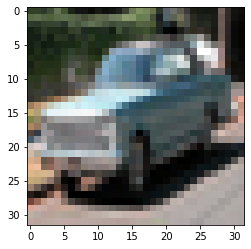

In [ ]:
# Plot
import matplotlib.pyplot as plt
def show_image(image):
  print(image.shape)
  fig = plt.figure
  plt.imshow(image)
  plt.show()

def show_sample(DATA,sample):
  print("Class : {}".format(idx_to_class[DATA.targets[sample]]))
  image = DATA.data[sample]# plot the sample
  show_image(image)



show_sample(cifar_trainset,32)


# Custom Dataset[TODO] [2 Marks]

In [ ]:
class my_CIFAR10(Dataset):
    def __init__(self, cifar_data, train=True, transform=None):
        self.is_train = train
        self.transform = transform
        self.to_pil = transforms.ToPILImage()

        self.images = cifar_data.data
        self.labels = np.array(cifar_data.targets)
        self.index = np.array(range(len(self.images)))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, item):
        anchor_img = self.images[item]  # Fill [0.2 Marks]
        anchor_label = self.labels[item] # Fill [0.2 Marks]

        if self.is_train:
            # TODO

            positive_list =  self.index[self.index!=item][self.labels[self.index!=item]==anchor_label] # Data Indices which belong to the same label as anchor_image   ## <--- Question 1 [0.3 Marks]
            positive_item = random.choice(positive_list)  # Choose a random item from positive_list [0.1 Marks]
            positive_img  =self.images[positive_item]  # Get the image corresponding to the chosen item [0.1 Marks]

            negative_list = self.index[self.index!=item][self.labels[self.index!=item]!=anchor_label] # Data Indices which DO NOT belong to the same label as anchor_image [0.3 Marks]
            negative_item = random.choice(negative_list) # Choose a random item from negative_list [0.1 Marks]
            negative_img  = self.images[negative_item] # Get the image corresponding to the chosen item [0.1 Marks]


            if self.transform:

                # Apply transform to all 3 images
                #TODO
                anchor_img =  self.transform(self.to_pil(anchor_img)) # Fill [0.1 Marks]
                positive_img = self.transform(self.to_pil(positive_img)) # Fill [0.1 Marks]
                negative_img = self.transform(self.to_pil(negative_img))# Fill [0.1 Marks]

            return anchor_img, positive_img, negative_img, anchor_label

        else:
            if self.transform:
                # Apply transform to anchor_img
                #TODO
                anchor_img = self.transform(self.to_pil(anchor_img)) # Fill [0.1 Marks]
            return anchor_img,anchor_label

In [ ]:
# TODO
# Define the transform for tensor conversion
# Feel free to experiment with other transforms like Random Cropping .e.t.c
transform = transforms.Compose([transforms.RandomCrop(32),transforms.ToTensor()])# Fill here [0.2 Marks]

In [ ]:
cifar_train_data = my_CIFAR10(cifar_trainset,transform=transform)
cifar_test_data =   my_CIFAR10(cifar_testset,train = False,transform = transform)

In [ ]:
train_size = int(0.8 * len(cifar_train_data))
val_size = len(cifar_train_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(cifar_train_data, [train_size, val_size])

## Check

If your dataset class is written properly then the following code should show 3 images where the first and second image should belong to the same class whereas the third image should NOT belong to the same class as first and second

torch.Size([32, 32, 3])


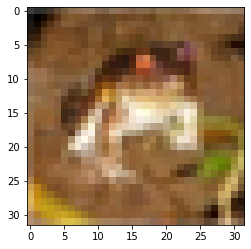

torch.Size([32, 32, 3])


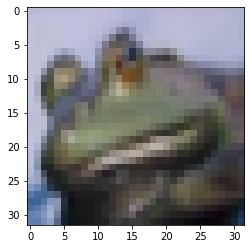

torch.Size([32, 32, 3])


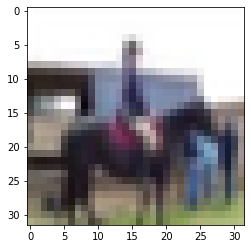

Class of anchor image:  frog


In [ ]:
for anchor_img, positive_img, negative_img, anchor_label in cifar_train_data:
  show_image(anchor_img.permute(1,2,0))
  show_image(positive_img.permute(1,2,0))
  show_image(negative_img.permute(1,2,0))
  print("Class of anchor image: ",idx_to_class[anchor_label])
  break

# Triplet loss [TODO] [2 Marks]

In [ ]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def calc_euclidean(self, x1, x2):
        euc_distance = F.pairwise_distance(x1, x2)  # Write code to calculate euclidean distance between x1 and x2 [1 Marks]
        return euc_distance

    def forward(self, anchor,positive,negative):
        distance_positive = self.calc_euclidean(anchor, positive)
        distance_negative = self.calc_euclidean(anchor, negative)
        losses =F.relu(distance_positive - distance_negative + self.margin) # Write code for TripletLoss here [1 Marks]


        return losses.mean()

# Resnet

You do not have to make any changes to this code block. However, students are strongly urged to understand the model as Resnet is one of the iconic models in the computer vision landscape

In [ ]:
"""This code was imported from the official PyTorch Torchvision GitHub repository for the purposes doing experiments
    with fine-tuned resnet architectures:
    https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py
"""

import torch
import torch.nn as nn
# Replaced 'from .utils import load_state_dict_from_url' with the following:
try:
    from torch.hub import load_state_dict_from_url
except ImportError:
    from torch.utils.model_zoo import load_url as load_state_dict_from_url


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            ) ## <--- Question 2

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x) ## <--- Question 3
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)


def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet18(pretrained=False, progress=True, **kwargs):
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)


# Resnet for TripletLoss [TODO] [1 Marks]

In [ ]:
class Resnet18Triplet(nn.Module):
    """Constructs a ResNet-18 model for training using triplet loss.
    Args:
        embedding_dimension (int): Required dimension of the resulting embedding layer that is outputted by the model.
                                   using triplet loss. Defaults to 512.
        pretrained (bool): If True, returns a model pre-trained on the ImageNet dataset from a PyTorch repository.
                           Defaults to False.
    """

    def __init__(self, embedding_dimension=512, pretrained=False):
        super(Resnet18Triplet, self).__init__()
        self.model = resnet18(pretrained=pretrained)

        # modify the last layer to return tensor of embedding_dimension
        input_features_fc_layer =self.model.fc.in_features  # Fill here [1 Marks]
        self.model.fc = nn.Linear(input_features_fc_layer, embedding_dimension, bias=False)

    def forward(self, images):
        """Forward pass to output the embedding vector and the embedding vector after l2-normalization"""
        embedding = self.model(images)
        # From: https://github.com/timesler/facenet-pytorch/blob/master/models/inception_resnet_v1.py#L301

        norm_embedding = F.normalize(embedding, p=2, dim=1) ## <--- Question 4

        return norm_embedding,embedding

# Set training parameters

In [ ]:
def init_weights(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_normal_(m.weight)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 10 # There is no need to run for more epochs than 50
EMB_DIM = 128 #
NUM_CLASSES = 10

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory = True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory = True)
test_loader = DataLoader(cifar_test_data, batch_size=32, shuffle=False, num_workers=2,pin_memory = True)


# Define the model

In [ ]:
model = Resnet18Triplet(embedding_dimension = 2,pretrained = True) # Changed embedding dimension from 256 --> 2
model.apply(init_weights)
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001) ## <--- Question 5
criterion = TripletLoss()

# Train embedding model [TODO] [1 Marks]

In [ ]:
model.train()
best_loss = 1000000
best_loss_epoch = -1
triplet_loss = TripletLoss()
for epoch in tqdm(range(epochs), desc="Epochs"):
    running_loss = []
    running_val_loss = []

    ## Training
    model.train()
    for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        anchor_img = anchor_img.to(device)
        positive_img = positive_img.to(device)
        negative_img = negative_img.to(device)

        optimizer.zero_grad()
        anchor_out,_ = model(anchor_img)
        positive_out,_ = model(positive_img)
        negative_out,_ = model(negative_img)

        loss = triplet_loss(anchor_out, positive_out, negative_out)# Fill here [0.4 Marks]
        loss.backward()
        optimizer.step()

        running_loss.append(loss.cpu().detach().numpy())


    ## Validation
    model.eval()
    for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(tqdm(val_loader, desc="Validation", leave=False)):
        anchor_img = anchor_img.to(device)
        positive_img = positive_img.to(device)
        negative_img = negative_img.to(device)

        anchor_out,_ = model(anchor_img)
        positive_out,_ = model(positive_img)
        negative_out,_ = model(negative_img)

        loss =triplet_loss(anchor_out, positive_out, negative_out) # Fill here [0.4 Marks]
        running_val_loss.append(loss.cpu().detach().numpy())

    print("Epoch: {}/{} - Train Loss: {:.4f} Val Loss: {:.4f}".format(epoch+1, epochs,np.mean(running_loss), np.mean(running_val_loss)))

    if(np.mean(running_val_loss) < best_loss):
      # Keep track of the best  epoch
      print("Current best loss at epoch: ",epoch+1)
      best_loss_epoch = epoch+1
      best_loss =np.mean(running_val_loss) # Fill here [0.1 Marks]
      store_data = {"model_state_dict": model.state_dict(),
            "optimzier_state_dict": optimizer.state_dict()
           }



Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 1/10 - Train Loss: 0.9975 Val Loss: 0.9816
Current best loss at epoch:  1


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 2/10 - Train Loss: 0.8781 Val Loss: 0.7567
Current best loss at epoch:  2


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 3/10 - Train Loss: 0.7096 Val Loss: 0.6947
Current best loss at epoch:  3


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 4/10 - Train Loss: 0.6855 Val Loss: 0.7002


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 5/10 - Train Loss: 0.7044 Val Loss: 0.6916
Current best loss at epoch:  5


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 6/10 - Train Loss: 0.7005 Val Loss: 0.6879
Current best loss at epoch:  6


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 7/10 - Train Loss: 0.6615 Val Loss: 0.6685
Current best loss at epoch:  7


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 8/10 - Train Loss: 0.6500 Val Loss: 0.7506


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 9/10 - Train Loss: 0.6471 Val Loss: 0.6691


Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 10/10 - Train Loss: 0.6438 Val Loss: 0.7421


In [ ]:
# Write code to load the best epoch
# TODO [0.1 Marks]
model.load_state_dict(store_data["model_state_dict"])
optimizer.load_state_dict(store_data["optimzier_state_dict"])


# Plot the results

If the model is trained correctly you should be able to see some level of grouping among embeddings belonging to the same class

In [ ]:
test_results = []
labels = []

model.eval()
with torch.no_grad():
    for img, label in tqdm(test_loader):
        test_results.append(model(img.to(device))[0].cpu().numpy())
        labels.append(label)

test_results = np.concatenate(test_results)
labels = np.concatenate(labels)
test_results.shape

  0%|          | 0/313 [00:00<?, ?it/s]

(10000, 2)

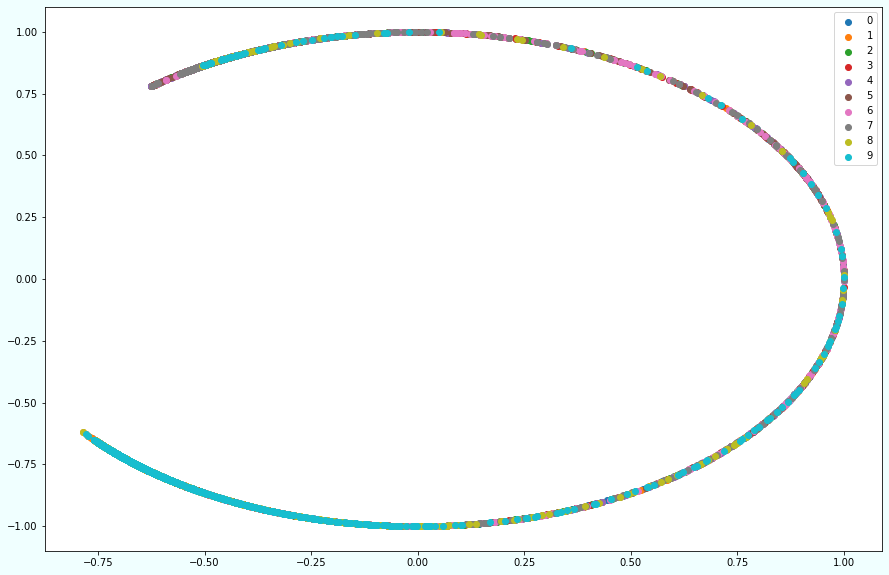

In [ ]:
plt.figure(figsize=(15, 10), facecolor="azure")
for label in np.unique(labels):
    tmp = test_results[labels==label] ## <--- Question 6
    plt.scatter(tmp[:, 0], tmp[:, 1], label=label)

plt.legend()
plt.show()

# Classifier [TODO][0.5 Marks]

In [ ]:
class Classifier(nn.Module):
    """Constructs a simple Classifier MLP head classfiying the embeddings from the previous model into classes
    Args:
        embedding_model:  Trained Resnet18Triplet model
        embedding_dimension (int): Required dimension of the resulting embedding layer that is outputted by the model.
                                   using triplet loss. Defaults to 512.
        num_classes: Number of classes
        device: Device on to which the embedding_model should be loaded. Defaults to cuda
    """

    def __init__(self, embedding_model,num_classes,embedding_dimension=512, device='cuda'):
        super(Classifier, self).__init__()
        # Load the embedding_model on the specified device !!
        self.embedding_model =embedding_model.to(device) # Fill here [0.1 Marks]
        self.embedding_model.eval() ## <--- Question 7
        # Create a Linear layer with number_of_input_feats = embedding_dimension and number_of_output_feats = num_classes
        self.classifier = nn.Linear(embedding_dimension, num_classes)# Fill here [0.4 Marks]
    def forward(self, images):
        """Forward pass to output the embedding vector (feature vector) after l2-normalization."""
        _,embedding = self.embedding_model(images)
        y = self.classifier(embedding)
        return y

# Define the classifier model [TODO][0.5 Marks]

We will use Adam optimizer(LR = 0.001) and cross entropy loss for training the classifier model

In [ ]:
cls_model =Classifier(embedding_model=Resnet18Triplet(),num_classes=10) # Fill here [0.1 Marks]
cls_model.apply(init_weights)
cls_model = cls_model.to(device)

optimizer =optim.Adam(cls_model.parameters(), lr=0.0001) # Fill here [0.2 Marks]
criterion = nn.CrossEntropyLoss()# Fill here [0.2 Marks]

# Train the classifier model [TODO] [1 Marks]


In [ ]:
cls_model.train()
model.eval()
best_loss = 100000
best_loss_epoch = -1
for epoch in tqdm(range(epochs), desc="Epochs"):
  running_loss = []
  running_val_loss = []

      # Training
model.train()
for step, (inputs, _, _, labels) in enumerate(tqdm(train_loader, desc="Training", leave=False)):

          optimizer.zero_grad() # Reset gradients
          inputs = inputs.to(device)
          labels = labels.to(device)
          outputs = cls_model(inputs)
          loss = criterion(outputs, labels) # Compute loss
          loss.backward() # Compute gradients     # <--- Question 8
          optimizer.step() # Update model parameters  # <--- Question 9

          running_loss.append(loss.cpu().detach().numpy())

      # Validation
model.eval()
for step, (inputs, _, _, labels) in enumerate(tqdm(val_loader, desc="Validation", leave=False)):

          inputs = inputs.to(device)
          labels = labels.to(device)
          with torch.no_grad():
              outputs = cls_model(inputs)
              loss = criterion(outputs, labels)

          running_val_loss.append(loss.cpu().detach().numpy())
print("Epoch: {}/{} - Train Loss: {:.4f} Val Loss: {:.4f}".format(epoch+1, epochs,np.mean(running_loss), np.mean(running_val_loss)))
if(np.mean(running_val_loss) < best_loss):  <--- Question 10
          print("Current best loss at epoch: ",epoch+1)
          best_loss_epoch = epoch+1
          best_loss = np.mean(running_val_loss)
          store_data = {"model_state_dict": cls_model.state_dict(),
                        "optimizer_state_dict": optimizer.state_dict()
                      }



Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/1250 [00:00<?, ?it/s]

Validation:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 10/10 - Train Loss: 1.5469 Val Loss: 1.3493
Current best loss at epoch:  10


In [ ]:
# Load the best classifier model checkpoint
# Write your code here
# TODO [0.1 Marks]
cls_model.load_state_dict(store_data["model_state_dict"])

<All keys matched successfully>

# Evaluate Prediction accuracy

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = cls_model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 52 %
